# Cross_section_II_JJ_extraction.ipynb

```
H Thompson
UQAM
May 2020
```

* Extract the indices for the cross sextion from Nipika to Fortress

In [7]:
# import rpnpy.librmn.all as rmn #module to read RPN files
import numpy as np #Good module for matrix and matrix operation
from mpl_toolkits.basemap import Basemap #Module for map representation
import matplotlib.pyplot as plt #Module to produce figure
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap

plt.style.use('seaborn-ticks')
%matplotlib inline

In [8]:
lats = np.load('/snow2/thompson/SPADE_analysis/Data/SPADE_lats_array.npy')
lons = np.load('/snow2/thompson/SPADE_analysis/Data/SPADE_lons_array.npy')
topo = np.load('/snow2/thompson/SPADE_analysis/Data/SPADE_dm_array.npy')

In [9]:
ndat = 17
dist_ndat = np.arange((ndat))
dist_km = dist_ndat*3

In [10]:
TOPO=np.zeros((ndat))
latgc=np.zeros((ndat)) 
longc=np.zeros((ndat))
II=np.zeros((ndat))
JJ=np.zeros((ndat))

In [11]:
LL_lat,LL_lon = 50.5, -116.5
UL_lat,UL_lon = 51.5, -116.5
LR_lat,LR_lon = 50.5, -114.5
UR_lat,UR_lon = 51.5, -114.5

Cen_lat = LL_lat + ((UL_lat - LL_lat) / 2) 
Cen_lon = LL_lon + ((abs(LL_lon) - abs(LR_lon))/2)

Powerline_loc = [50.82423333, -115.1972167]
Junction_loc = [50.785568, -115.160941]
Nipika_loc = [50.61183889, -115.8008167]
Storm_Lodge_loc = [51.25283667, -115.9988733]
BGI_loc = [51.026681, -115.034411]

m=Basemap(llcrnrlon=-116.5,llcrnrlat=50.5,urcrnrlon=-114.5,urcrnrlat=51.5,resolution='l',projection='lcc',lat_0=Cen_lat,lon_0=Cen_lon)

xx,yy=m(lons,lats)

xgc,ygc=m.gcpoints(Nipika_loc[1],Nipika_loc[0],Powerline_loc[1],Powerline_loc[0],ndat)

for j in range(ndat):
    dist=np.sqrt((xx-xgc[j])**2+(yy-(ygc[j]))**2) 
    I,J=np.where(dist==np.min(dist)) 
    II[j]=int(I)
    JJ[j]=int(J)
    TOPO[j]=topo[I,J]
    latgc[j]=lats[I,J]
    longc[j]=lons[I,J]

Text(48,-500,'Fortress')

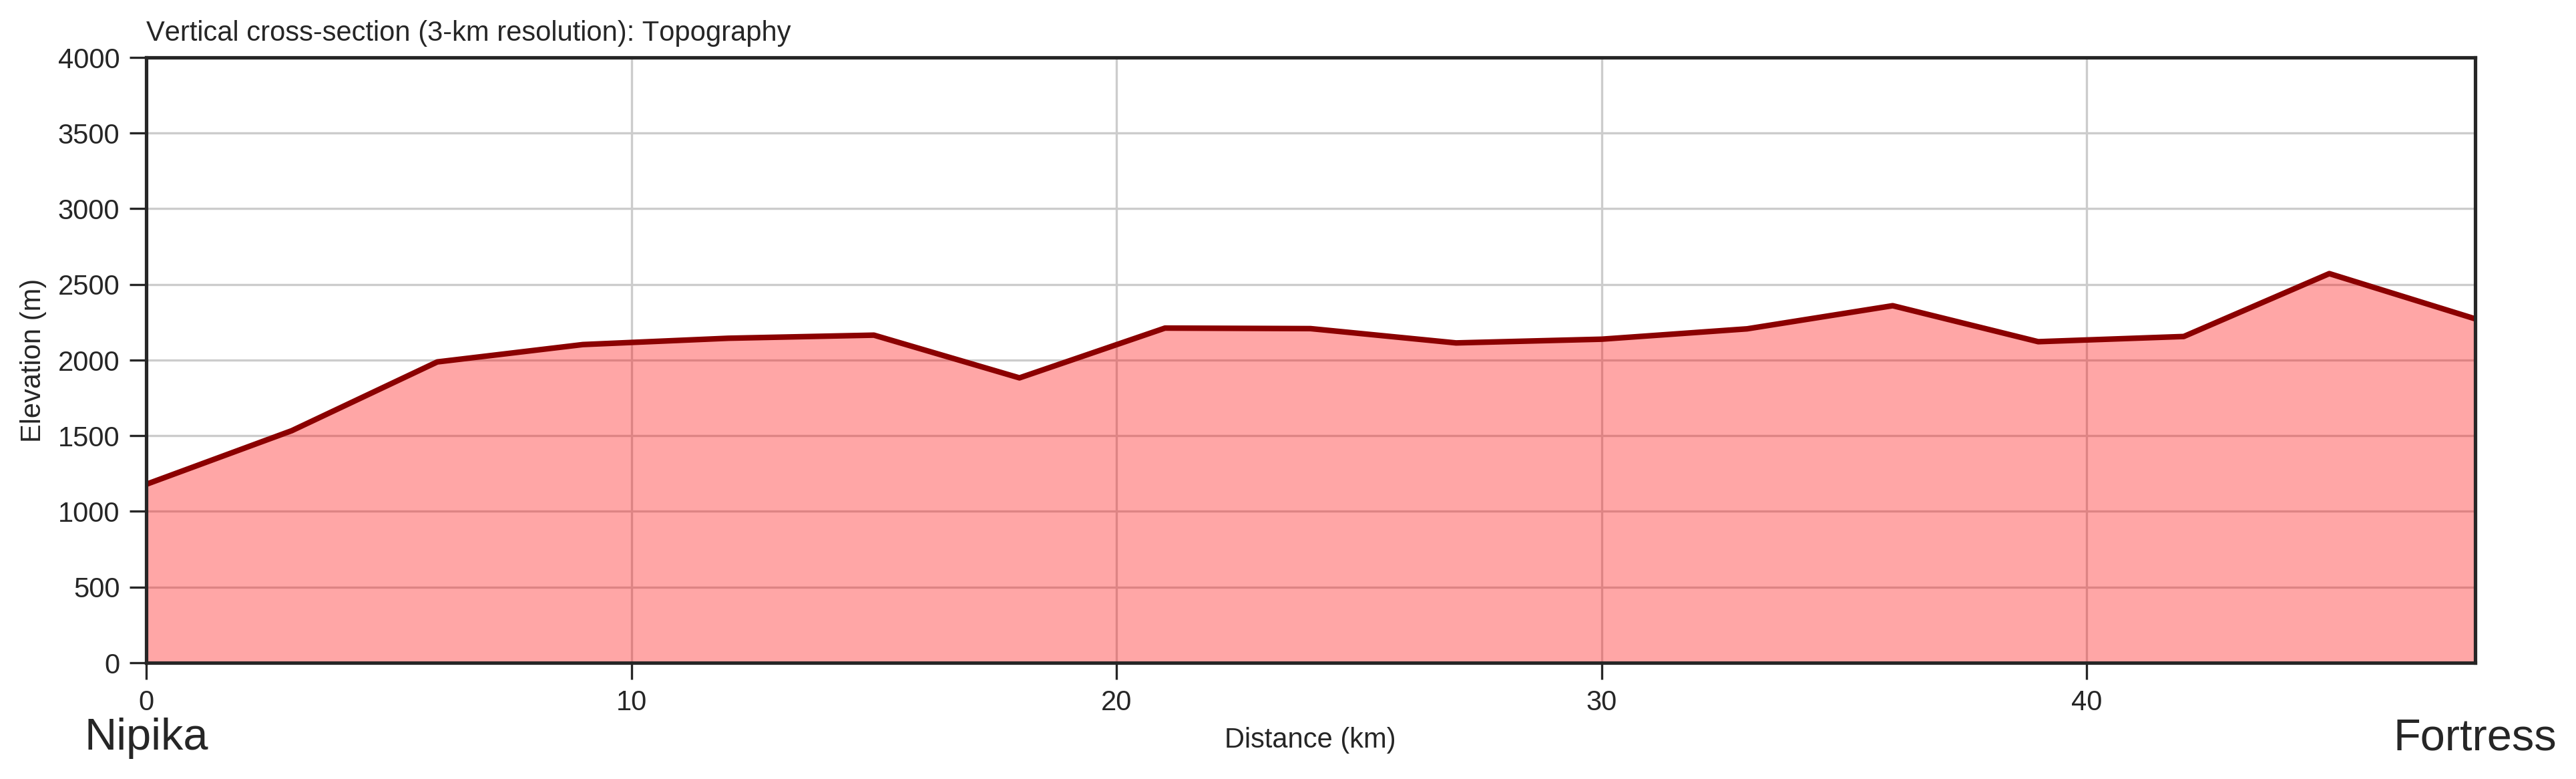

In [21]:
fig,ax=plt.subplots(figsize=(15,4), dpi=300, facecolor='white')
ax.set_title('Vertical cross-section (3-km resolution): Topography', loc='left', fontsize=10)
ax.plot(dist_km, TOPO, color='darkred', linewidth=2)
ax.fill_between(dist_km, TOPO,color='r', alpha=.35)
ax.set_ylim(0,4000)
ax.set_xlim(dist_km[0],dist_km[-1])
ax.set_xlabel('Distance (km)')
ax.set_ylabel('Elevation (m)')
ax.grid()
ax.text(dist_km[0], -500, 'Nipika', va='center', ha='center', fontsize=16)
ax.text(dist_km[-1], -500, 'Fortress', va='center', ha='center', fontsize=16)